# CE888 Assignment 1 for Demo

This code is written to demonstarte data analysis made for ce888 assignment 1.

**Author**          : Tomoko Ayakawa<br> 
**Created on**      : 5 February 2019<br> 
**Last modified on**: 18 February 2019<br> 

In [1]:
# import open source libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys

# import original libraries
sys.path.append("../")

import assignment1_main as MAIN
import load_data as DATA
import histogram as HST
import correlation as CRRL
import pca as PCA
import classifier as CLS
import feature_importance as IMP

/Users/tomoko/Documents/04_MSc/2_Modules/CE888-7-SP Data Science And Decision Making/03_Assignment/03_Deliverables/ce888assignment


## 1. Load Data
Load data from **data** directory.<br>
Reading and preprocessing data into pandas.DataFrame are done by respective python files.<br>
#### Returned variables<br>
>`col_names` : List --- Name of the columns (including target column)<br>
`features_df` : DataFrame --- Feature values<br>
`targets_df` : DataFrame --- Target values<br>
`data_df` : DataFrame --- The whole data containing both features and targets<br>
`pic_file`: String --- Prefix for file name (data name + timestamp)<br>
`unique_labels` : List --- Column haeders containing feature names and terget name ("Class")
>

#### Select data to load (Argument `data_id`)
> 0. Human Activity
1. Spam
2. Phishing
>

In [8]:
data_id = int(input("Select the data to load (0: human activity, 1: spam, 2: phishing): "))

col_names, features_df, targets_df, data_df, pic_file = DATA.load_data(data_id=data_id)
unique_labels = DATA.verify_data(data_df, targets_df)
data_df.head(5)

Select the data to load (0: human activity, 1: spam, 2: phishing): 2
Number of NaN: 0
Data shape:  (11055, 31)
Target labels: [-1.  1.]


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Class
0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0
1,1.0,1.0,1.0,1.0,1.0,-1.0,0.0,1.0,-1.0,1.0,...,1.0,1.0,-1.0,-1.0,0.0,-1.0,1.0,1.0,1.0,-1.0
2,1.0,0.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,0.0,-1.0,-1.0
3,1.0,0.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
4,1.0,0.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,...,-1.0,1.0,-1.0,-1.0,0.0,-1.0,1.0,1.0,1.0,1.0


## 2. Analyse the Data

### 2-1. Data Structure
#### (1) Feature distribution

In [ ]:
HST.histogram(data_df[data_df.columns[:-1]], pic_file, "_features")

#### (2) Target distribution

In [ ]:
HST.histogram(data_df[data_df.columns[-1:]], pic_file, "_targets")

#### (3) Correlation among features

In [ ]:
cr_np = CRRL.correlation(data_df)
CRRL.cr_heatmap (cr_np, pic_file, col_names)

### 2-2. Feature importance
#### (1) Correlation with the target

In [ ]:
CRRL.cr_bar_graph (cr_np, pic_file, col_names)

#### (2) Feature Importance based on Decision Tree

In [ ]:
clf = CLS.train (features_df, targets_df, 0)[-1]
IMP.feature_importance(clf, col_names, pic_file, pic_file.split("_")[0])

### 2-3. Principal Component Analysis (PCA)

<IPython.core.display.Javascript object>


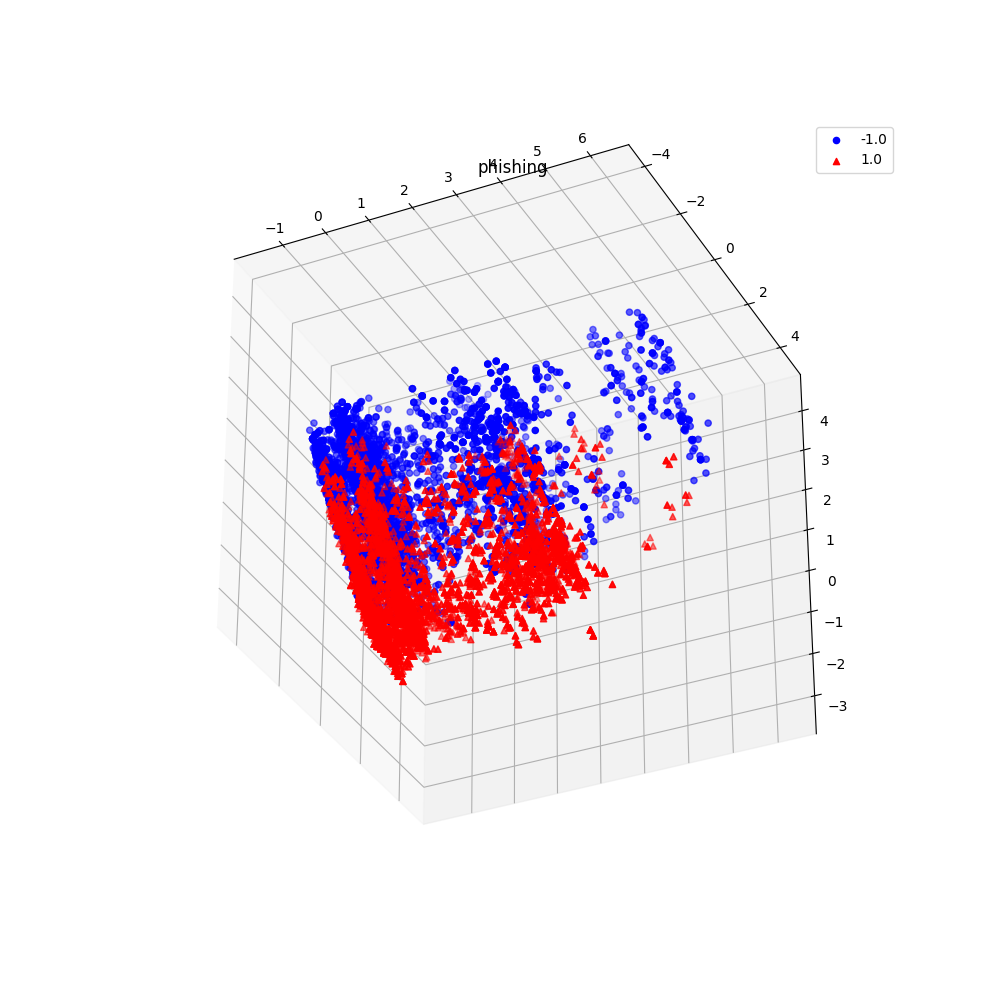

In [9]:
%matplotlib notebook
PCA.pca(features_df.values, targets_df.values, unique_labels, pic_file)

### 2-4. Classification with small training data
#### Obtain minimal size data

In [ ]:
X, y = MAIN.get_minimal_data(features_df.values, targets_df.values)
#X, y = features_df.values, targets_df.values

#### (1) Decision Tree

In [ ]:
%matplotlib inline

title = "%s_Decision_Tree" % pic_file.split("_")[0]
true_label, pred_label, clf = CLS.train (X, y, 0)
CLS.plot_confusion_matrix(true_label, pred_label, unique_labels, pic_file, title, "Decision_Tree")
clf

#### (2) Naive Bayes

In [ ]:
title = "%s_Naive Bayes" % pic_file.split("_")[0]
true_label, pred_label, clf = CLS.train (X, y, 1)
CLS.plot_confusion_matrix(true_label, pred_label, unique_labels, pic_file, title, "Naive Bayes")
clf

#### (3) SVM

In [ ]:
title = "%s_SVM" % pic_file.split("_")[0]
true_label, pred_label, clf = CLS.train (X, y, 2)
CLS.plot_confusion_matrix(true_label, pred_label, unique_labels, pic_file, title, "SVM")
clf